<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/SNS_ACT3_7_CarlosJavierDelgadoBola%C3%B1os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación del dataset: Utilizar el drive/github como origen de ficheros para la imp3rtadón del cIstaset

Además de la división de los datos de train y test, incorpora la utilización de datos de validación.

Preparación de las datos: Normaliza, ajusta la calidad de los datos
 Selección de carcateristicas explora herramientas gráficas o no gráficas, que no sean los dendogramas, para la elección de las caractaerísticas

Selección de carcateristicas: Utiliza dendogramas para la elección de las caractaeristicas

Entrenamiento: Elegir un modelo de regresión o SVM - Desarrolla las diversas pruebas propuestas para la selección y justificia el criterio de calidad para la selección del modelo. Utiliza Cross Validation y pruebas de hiperparámetros (GridSearch y RandomSearch)

Entrenamiento: Utilizar la librería Lazy Precict para determinar otros posibles modelos a utilizar para la resolución del problema, elije uno de los modelos propuestos y compara la predicción con el modelo de regresión o SVM elegido

Predicción: Utiliza herramientas gráficas para ayudar a entender la precisión de los resultados obtenidos Predicción: Describe con claridad una valoración de los resultados obtenidos.

Submit del fichero con la predicción y captura de la valoración /posidonamiento obtenido en la competición Propone soluciones creativas e innovadoras

Registra en el pdf final, un cuaderno de bitácora/seguimiento donde se muestra los submitis realizados, explicando los ajustes o mejoras que han motivado cada subida o un grupo de submits

El pdf final tiene una portada., utiliza un índice, apartado de conclusiones y referencias (web). Se hace mención a referencias externas, no recogidas en el material suministrado.

Comenta con claridad cada uno de los pasos realizados.


Importación del dataset: Utilizar el drive/github como origen de ficheros para la imp3rtadón del cIstaset




In [1]:
import pandas as pd

url = "https://github.com/skyteck8/BigDataMachineLearning/blob/main/prediccion_terremotos/train_values.csv?raw=true"
train_values_x = pd.read_csv(url)
url = "https://github.com/skyteck8/BigDataMachineLearning/blob/main/prediccion_terremotos/train_labels.csv?raw=true"
train_labels_y = pd.read_csv(url)
url = "https://github.com/skyteck8/BigDataMachineLearning/blob/main/prediccion_terremotos/test_values.csv?raw=true"
test_values_x = pd.read_csv(url)
url = "https://github.com/skyteck8/BigDataMachineLearning/blob/main/prediccion_terremotos/submission_format.csv?raw=true"
submission_format = pd.read_csv(url)
df_train = pd.merge(train_values_x,train_labels_y,on=['building_id'])
df_train =df_train.drop('building_id', axis=1)
df_filtrado = df_train.loc[~df_train['plan_configuration'].isin(['f', 'n'])]
# Filtrando el DataFrame para conservar solo las filas donde 'geo_level_1_id' es 26 o 7
filtered_train_values_x = df_filtrado[(df_filtrado['geo_level_1_id'] == 26) | (train_values_x['geo_level_1_id'] == 7)]
#Como ya hemos visto las columnas que son menos determinantes para el entrenbamiento del modelo, las eliminaremos previo al procesado para dejar los datos mas limpios, los datos eliminados son desde has_superstructure_bamboo
filtered_train_values_x = filtered_train_values_x.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'has_secondary_use_gov_office','has_superstructure_bamboo', 'has_superstructure_other', 'has_superstructure_cement_mortar_stone', 'count_families', 'legal_ownership_status', 'has_secondary_use_agriculture', 'has_secondary_use_institution', 'has_secondary_use_industry', 'has_superstructure_adobe_mud', 'has_secondary_use_other','has_secondary_use_school', 'has_secondary_use_use_police', 'has_secondary_use_health_post', 'has_superstructure_mud_mortar_brick'], axis=1)
df_train=filtered_train_values_x

<ipython-input-1-eb37790b1c80>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_train_values_x = df_filtrado[(df_filtrado['geo_level_1_id'] == 26) | (train_values_x['geo_level_1_id'] == 7)]


In [2]:
df_train_trans= df_train.copy()

df_train_trans["land_surface_condition"].replace(['t', 'o', 'n'],[0, 1, 2], inplace=True)
df_train_trans["foundation_type"].replace(['r', 'w', 'i', 'u', 'h'],[0, 1, 2, 3, 4], inplace=True)
df_train_trans["roof_type"].replace(['n', 'q', 'x'],[0, 1, 2], inplace=True)
df_train_trans["ground_floor_type"].replace(['f', 'x', 'v', 'z', 'm',],[0, 1, 2, 3, 4], inplace=True)
df_train_trans["other_floor_type"].replace(['q', 'x', 'j', 's'],[0, 1, 2, 3], inplace=True)
df_train_trans["position"].replace(['t', 's', 'j', 'o'],[0, 1, 2, 3], inplace=True)
df_train_trans["plan_configuration"].replace(['d', 'u', 's', 'q', 'm', 'c', 'a', 'n', 'f', 'o'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
# df_train_trans["legal_ownership_status"].replace(['v', 'a', 'r', 'w'],[0, 1, 2, 3], inplace=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Scaler=MinMaxScaler()
y = df_train_trans["damage_grade"]
datos_escalados=Scaler.fit_transform(df_train_trans)
df_train_escalados=pd.DataFrame(datos_escalados, columns=df_train_trans.columns)

# Ahora dividimos df_filtered en lugar de df_train_final
X = df_train_escalados.drop("damage_grade", axis=1)
# y = df_train_escalados["damage_grade"]

# Realizar la división en entrenamiento y temporal
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Dividir temporal en prueba y validación con stratify
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
y.head()

9     1
18    2
26    2
41    2
45    1
Name: damage_grade, dtype: int64

Sin escalar la y

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# Scaler=MinMaxScaler()

# datos_escalados=Scaler.fit_transform(df_train_trans)
# df_train_escalados=pd.DataFrame(datos_escalados, columns=df_train_trans.columns)

# # Ahora dividimos df_filtered en lugar de df_train_final
# X = df_train_escalados.drop("damage_grade", axis=1)
# y = df_train_escalados["damage_grade"]

# # Realizar la división en entrenamiento y temporal
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# # Dividir temporal en prueba y validación con stratify
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

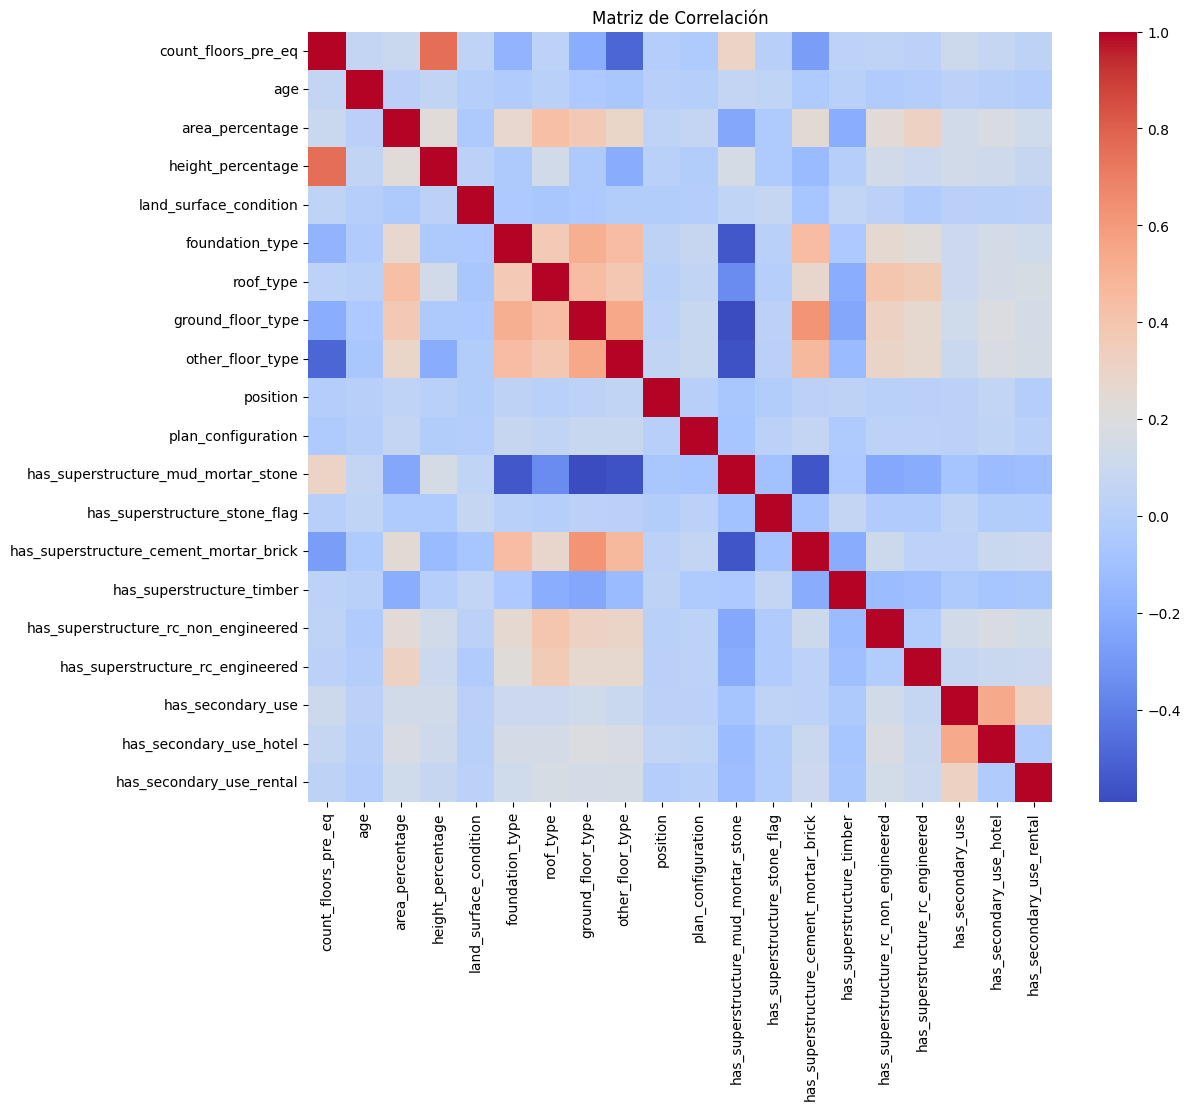

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_train_final es tu DataFrame final después del procesamiento
correlation_matrix = X_train.corr()

# Dibujar el heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [5]:
from sklearn.feature_selection import f_regression

df_to_select_best = X_train
# df_to_select_best.head()
# Calcular puntuaciones y p-values con f_regression
scores, p_values = f_regression(df_to_select_best, y_train)

# Crear un DataFrame para tener una mejor visualización de las características con sus puntuaciones y p-values
features_scores = pd.DataFrame({'Feature': df_to_select_best.columns, 'Score': scores, 'P-value': p_values})
features_scores = features_scores.sort_values(by='Score', ascending=False)  # Ordenar por Score de manera descendente

print(features_scores)

                                   Feature        Score        P-value
11     has_superstructure_mud_mortar_stone  6547.844143   0.000000e+00
7                        ground_floor_type  3460.881713   0.000000e+00
5                          foundation_type  3206.215010   0.000000e+00
13  has_superstructure_cement_mortar_brick  3047.612800   0.000000e+00
8                         other_floor_type  3026.112792   0.000000e+00
15    has_superstructure_rc_non_engineered   771.490063  2.982548e-167
0                      count_floors_pre_eq   740.149747  1.226659e-160
6                                roof_type   699.999805  3.753331e-152
16        has_superstructure_rc_engineered   638.396905  4.182375e-139
12           has_superstructure_stone_flag   488.217824  3.710416e-107
2                          area_percentage   466.988146  1.265485e-102
19                has_secondary_use_rental   267.387015   8.620874e-60
14               has_superstructure_timber   235.624955   6.176681e-53
18    

Selección de carcateristicas: Utiliza dendogramas para la elección de las caractaeristicas

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-6-f44b89101829>:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


Distancia Media	  57.72


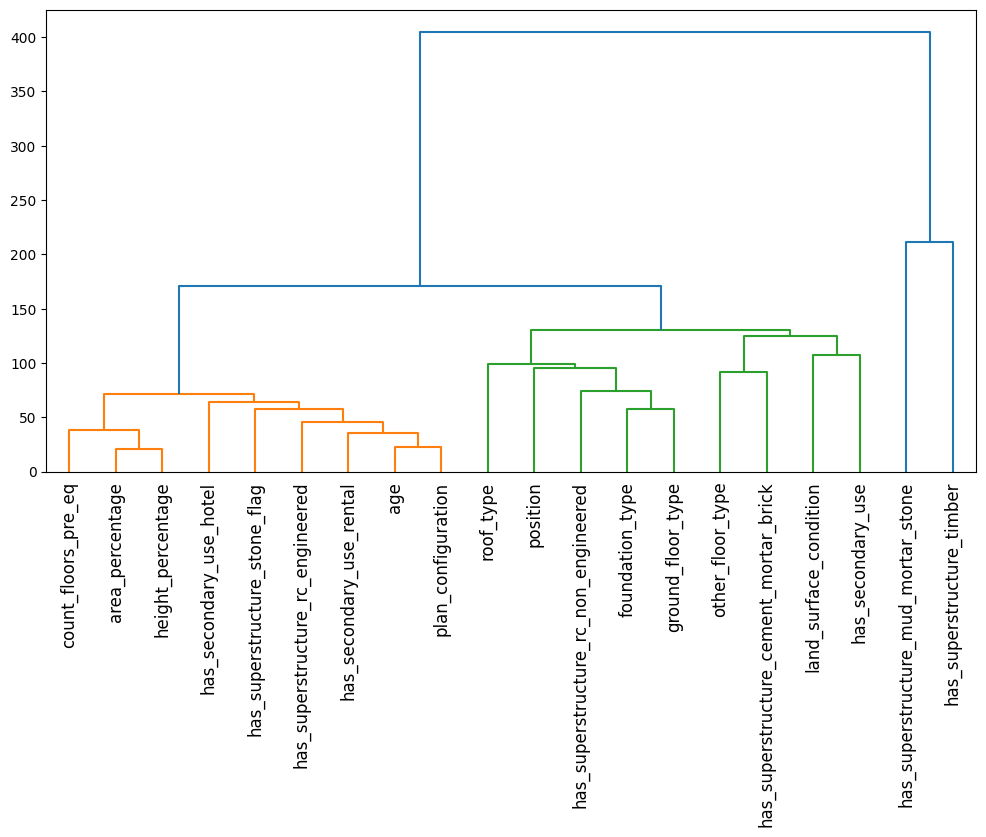

In [6]:

import numpy as np
import sklearn.neighbors
import matplotlib.pyplot as plt

## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(X_train.T)
#D=dist.pairwise(X_train.T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Construimos el dendograma
from scipy import cluster
plt.figure(figsize=(12, 6))
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=160,labels=X_train.columns.to_list(),leaf_rotation=90)
#cluster.hierarchy.dendrogram(clusters, color_threshold=160,labels=X_train.columns.to_list(),leaf_rotation=90)
plt.show()

In [7]:
threshold = 130 # ad-hoc, es decir por criterio de la persona que está resolviendo el problema
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels


Número de clusters 5


array([1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 1, 4, 1, 3, 5, 2, 1, 3, 1, 1],
      dtype=int32)

In [9]:
from sklearn.decomposition import PCA
import numpy as np

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = X_train
y_pca = y_train.astype('int')
X_pca = pca.fit_transform(X_pca)
X_pca

array([[-0.24432748, -0.40378028],
       [ 1.47749586, -0.23542888],
       [-0.50128857, -0.41709612],
       ...,
       [-0.23740998, -0.40076482],
       [-0.72114496,  0.56359292],
       [ 0.2833614 ,  0.87340363]])

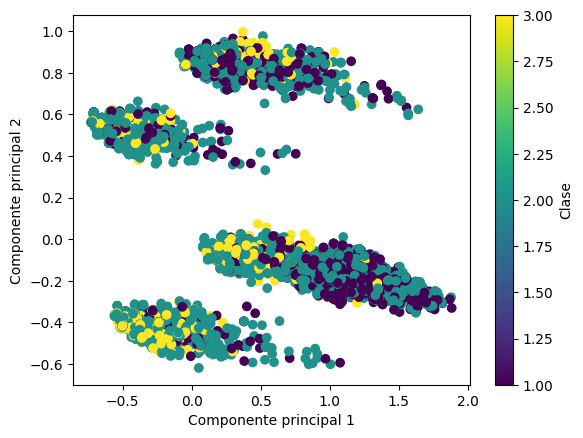

In [10]:

# Visualizar los datos en el nuevo espacio de características PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca, cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Clase')
plt.show()

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

predictions = model.predict(X_train)

# Mostramos las predicciones
print("Predicciones:", predictions)

def redondear_predicciones(predicciones):
    # Definimos los valores a los cuales queremos redondear
    valores_a_redondear = np.array([1, 2, 3])

    # Expandimos las dimensiones de 'predicciones' para poder hacer la resta
    predicciones_expandidas = np.expand_dims(predicciones, axis=-1)

    # Calculamos la diferencia absoluta con los valores a redondear
    diferencias = np.abs(predicciones_expandidas - valores_a_redondear)

    # Obtenemos los índices de los valores mínimos en las diferencias
    indices_minimos = np.argmin(diferencias, axis=-1)

    # Usamos estos índices para obtener los valores finales redondeados
    predicciones_redondeadas = valores_a_redondear[indices_minimos]

    return predicciones_redondeadas

# Uso de la función para redondear las predicciones
predictions_redondeadas = redondear_predicciones(predictions)

# Mostramos las predicciones redondeadas
print("Predicciones redondeadas:", predictions_redondeadas)

Predicciones: [2.25858167 1.44973896 2.28020932 ... 2.21374328 2.1184309  1.581051  ]
Predicciones redondeadas: [2 1 2 ... 2 2 2]


Accuracy: 0.5914099122561


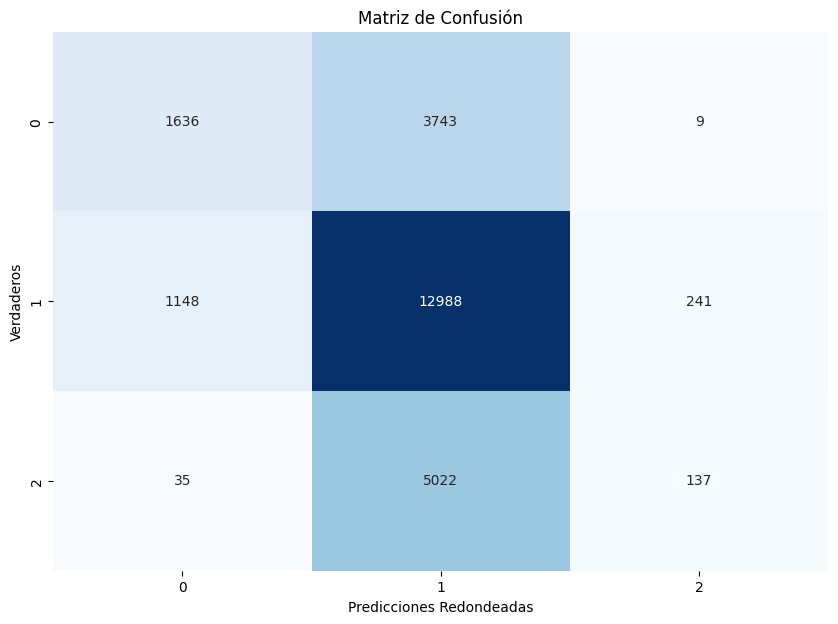

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Asumiendo que 'predictions_redondeadas' y 'y_train' ya están definidos

# Calcula la accuracy
accuracy = accuracy_score(y_train, predictions_redondeadas)
print("Accuracy:", accuracy)

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(y_train, predictions_redondeadas)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones Redondeadas')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [12]:
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_pca, y_pca)

predictions = model.predict(X_pca)

# Mostramos las predicciones
print("Predicciones:", predictions)

def redondear_predicciones(predicciones):
    # Definimos los valores a los cuales queremos redondear
    valores_a_redondear = np.array([1, 2, 3])

    # Expandimos las dimensiones de 'predicciones' para poder hacer la resta
    predicciones_expandidas = np.expand_dims(predicciones, axis=-1)

    # Calculamos la diferencia absoluta con los valores a redondear
    diferencias = np.abs(predicciones_expandidas - valores_a_redondear)

    # Obtenemos los índices de los valores mínimos en las diferencias
    indices_minimos = np.argmin(diferencias, axis=-1)

    # Usamos estos índices para obtener los valores finales redondeados
    predicciones_redondeadas = valores_a_redondear[indices_minimos]

    return predicciones_redondeadas

# Uso de la función para redondear las predicciones
predictions_redondeadas = redondear_predicciones(predictions)

# Mostramos las predicciones redondeadas
print("Predicciones redondeadas:", predictions_redondeadas)

Predicciones: [2.21339385 1.42117022 2.32824317 ... 2.20954145 2.14250959 1.61975645]
Predicciones redondeadas: [2 1 2 ... 2 2 2]


Accuracy: 0.5784686886493849


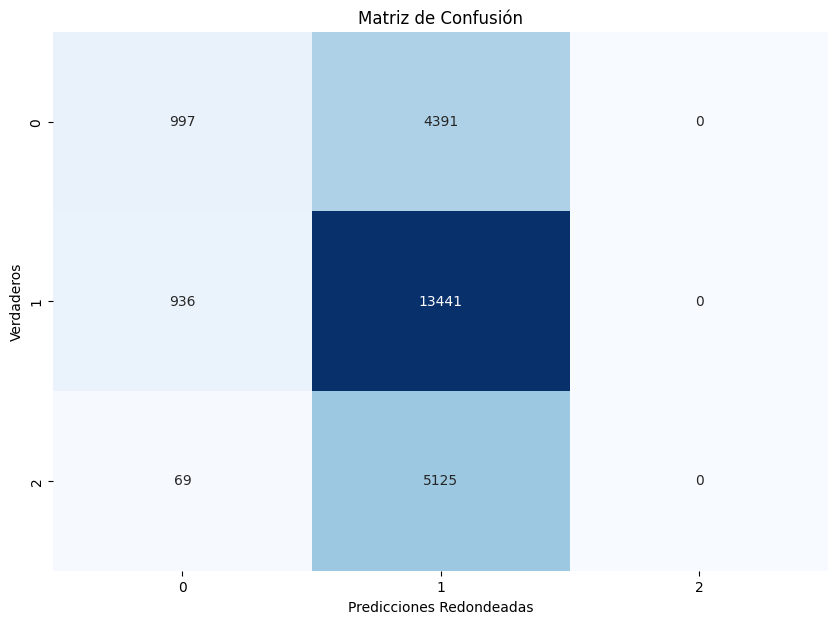

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Asumiendo que 'predictions_redondeadas' y 'y_train' ya están definidos

# Calcula la accuracy
accuracy = accuracy_score(y_pca, predictions_redondeadas)
print("Accuracy:", accuracy)

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(y_pca, predictions_redondeadas)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones Redondeadas')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Inicializar el LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Ajustar y predecir todos los modelos
models, predictions = clf.fit(X_train, X_test, y_train, y_test) # Asegúrate de tener X_test y y_test

# Ver los resultados
print(models)

 10%|█         | 3/29 [00:06<00:47,  1.81s/it]/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 38%|███▊      | 11/29 [01:45<01:40,  5.59s/it]/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervise

In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# Crear una instancia del modelo LGBMClassifier
lgbm_classifier = lgb.LGBMClassifier(boosting_type='gbdt',  # Tipo de algoritmo de boosting, 'gbdt' es el tradicional Gradient Boosting Decision Tree
                                     num_leaves=31,         # Número máximo de hojas en un árbol
                                     n_estimators=100,      # Número de árboles a construir
                                     learning_rate=0.1)     # Tasa de aprendizaje

# Entrenar el modelo
lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_train)

# Evaluar el modelo
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.4f}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 24959, number of used features: 20
[LightGBM] [Info] Start training from score -1.533060
[LightGBM] [Info] Start training from score -0.551605
[LightGBM] [Info] Start training from score -1.569730
Accuracy: 0.6911


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# Crear una instancia del modelo LGBMClassifier
lgbm_classifier = lgb.LGBMClassifier(boosting_type='gbdt',  # Tipo de algoritmo de boosting, 'gbdt' es el tradicional Gradient Boosting Decision Tree
                                     num_leaves=31,         # Número máximo de hojas en un árbol
                                     n_estimators=100,      # Número de árboles a construir
                                     learning_rate=0.1)     # Tasa de aprendizaje

# Entrenar el modelo
lgbm_classifier.fit(X_train, y_train)

y_test_pred = lgbm_classifier.predict(X_train)

# Evaluar el modelo
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.4f}')

In [16]:
y_pred

array([3, 1, 2, ..., 3, 2, 1])

In [15]:
# submit_logreg_grid_s = submission_format.copy()
# submit_logreg_grid_s['damage_grade'] = res;
# submit_logreg_grid_s.to_csv('predict_logreg_grids.csv', index=False)
# files.download('predict_logreg_grids.csv')

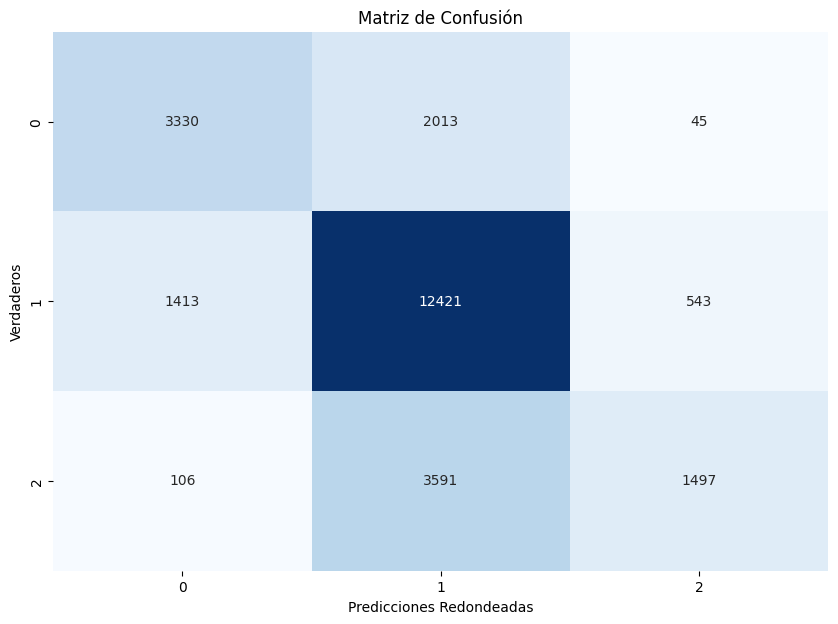

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(y_train, y_pred)


# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones Redondeadas')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()